# 02 Recommender Systems for Amazon Product Review - EDA


In this code notebook, we will explore the datasets obtained from Amazon's beauty product as well as the accompanying review dataset.

What will be covered:
- EDA (null values, typecasting and data visualization)
- Summarizing long text via pretrained model from huggingface

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from transformers import pipeline

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
import re

In [2]:
df_review = pd.read_json('Amazon beauty dataset/All_Beauty.json', lines = True)
df_product = pd.read_json('Amazon beauty dataset/meta_All_Beauty.json', lines = True)

In [3]:
print(df_review.shape)
df_review.head()

(371345, 12)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [4]:
print(df_product.shape)
df_product.head()

(32892, 19)


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


# Review Data EDA

In [5]:
df_review.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [6]:
review = df_review[['overall', 'reviewerID', 'asin', 'reviewText', 'summary']]

In [7]:
review

,overall,reviewerID,asin,reviewText,summary
0,1,A1V6B6TNIC10QE,0143026860,great,One Star
1,4,A2F5GHSXFQ0W6J,0143026860,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...
2,4,A1572GUYS7DGSR,0143026860,"This book was very informative, covering all a...",Worth the Read
3,5,A1PSGLFK1NSVO,0143026860,I am already a baseball fan and knew a bit abo...,Good Read
4,5,A6IKXKZMTKGSC,0143026860,This was a good story of the Black leagues. I ...,"More than facts, a good story read!"
...,...,...,...,...,...
371340,1,A202DCI7TV1022,B01HJEGTYK,It was awful. It was super frizzy and I tried ...,It was super frizzy and I tried to comb it and...
371341,5,A3FSOR5IJOFIBE,B01HJEGTYK,I was skeptical about buying this. Worried it...,Awesome
371342,5,A1B5DK6CTP2P24,B01HJEGTYK,Makes me look good fast.,Five Stars
371343,2,A23OUYS5IRMJS9,B01HJEGTYK,Way lighter than photo\nNot mix blend of color...,Ok but color way off and volume as well


In [8]:
# create a funtion to explore the text in dataset
def review_eda(data, index):
    print(f"Comparing review text and summary on index : {index}\n")
    print("Overall\n")
    print(data["overall"][index])
    print("\nReview Text\n")
    print(data["reviewText"][index])
    print("\nSummary\n")
    print(data["summary"][index])

In [9]:
review.isna().sum()

overall         0
reviewerID      0
asin            0
reviewText    399
summary       206
dtype: int64

In [10]:
review.dropna(inplace = True)

/var/folders/rq/jvgm9dz559g9xyvpqqc2rlcm0000gn/T/ipykernel_29873/2258709496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review.dropna(inplace = True)


In [11]:
review.shape

(370756, 5)

In [12]:
review.head()

,overall,reviewerID,asin,reviewText,summary
0,1,A1V6B6TNIC10QE,0143026860,great,One Star
1,4,A2F5GHSXFQ0W6J,0143026860,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...
2,4,A1572GUYS7DGSR,0143026860,"This book was very informative, covering all a...",Worth the Read
3,5,A1PSGLFK1NSVO,0143026860,I am already a baseball fan and knew a bit abo...,Good Read
4,5,A6IKXKZMTKGSC,0143026860,This was a good story of the Black leagues. I ...,"More than facts, a good story read!"


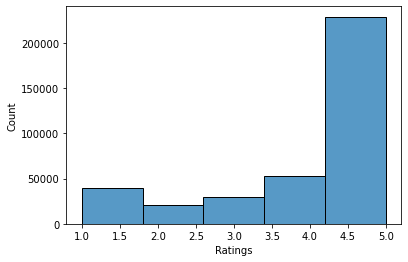

In [13]:
ax = sns.histplot(data = review, x = "overall", bins = 5)
ax.set(xlabel='Ratings', ylabel='Count')
plt.show()

In [14]:
review['overall'].value_counts(normalize = True)

5    0.618024
4    0.141915
1    0.105722
3    0.079659
2    0.054680
Name: overall, dtype: float64

Alot of the users are very generous with the 5 star ratings. 61.8% of the reviews are given 5/5. Which means that we are unable to simply use the weighted 'overall' score of each item to recommend to our users.

In [15]:
review_eda(review,35_000)

Comparing review text and summary on index : 35000

Overall

3

Review Text

I regret that I allowed my dentist to convince me to purchase this one.  It looks nice, but it makes a mess in use if you aren't very very careful  bu allowing water to spurt all over.  To me it is a waste of money and I can do the same thorough cleaning  with other means that didn't cost what this one did.

Summary

It looks nice, but it makes a mess in use if ...


In [16]:
review_eda(review,100_000)

Comparing review text and summary on index : 100000

Overall

4

Review Text

The Braun Series 1-195s was ok to good but after trying it I went ahead and had my older GERMAN made Braun single foil razor overhauled ($45.00)which is well over 20 years old and it shaves much better!

Summary

Braun Series 1-195s  (Made in China) OK


In [17]:
review_eda(review,30)

Comparing review text and summary on index : 30

Overall

5

Review Text

This Cell Phone Charm is way bigger than In the picture, which comes in handy when I'm walking around With my Cell Phone at Work.

Summary

Akatsuki Pride


In [18]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370756 entries, 0 to 371344
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     370756 non-null  int64 
 1   reviewerID  370756 non-null  object
 2   asin        370756 non-null  object
 3   reviewText  370756 non-null  object
 4   summary     370756 non-null  object
dtypes: int64(1), object(4)
memory usage: 25.0+ MB


In [19]:
review.duplicated().sum()

8727

We will drop duplicated rows since it can be a  possiblity that users made a double entry when submitting their reviews.

# Product Data EDA

In [20]:
df_product.dtypes

category           object
tech1              object
description        object
fit                object
title              object
also_buy           object
tech2              object
brand              object
feature            object
rank               object
also_view          object
details            object
main_cat           object
similar_item       object
date               object
price              object
asin               object
imageURL           object
imageURLHighRes    object
dtype: object

In [21]:
df_product.isna().sum()

category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
asin               0
imageURL           0
imageURLHighRes    0
dtype: int64

In [22]:
product = df_product[['description', 'title', 'also_buy', 'brand', 'rank', 'price', 'asin', 'imageURLHighRes']]

In [23]:
print(product.shape)
product.head()

(32892, 8)


,description,title,also_buy,brand,rank,price,asin,imageURLHighRes
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,[],idea village,"2,938,573 in Beauty & Personal Care (",,6546546450,[]
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,"872,854 in Beauty & Personal Care (",$44.99,7178680776,[]
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,[],No7,"956,696 in Beauty & Personal Care (",$28.76,7250468162,[]
3,[],Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,"1,870,258 in Beauty & Personal Care (",,7367905066,[https://images-na.ssl-images-amazon.com/image...
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,[],Pirmal Healthcare,"67,701 in Beauty & Personal Care (",$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...


In [24]:
product.isna().sum()

description        0
title              0
also_buy           0
brand              0
rank               0
price              0
asin               0
imageURLHighRes    0
dtype: int64

In [25]:
product.iloc[3]

description                                                       []
title              Wella Koleston Perfect Hair Colour 44/44 Mediu...
also_buy                                                [B0041PBXX8]
brand                                                               
rank                           1,870,258 in Beauty & Personal Care (
price                                                               
asin                                                      7367905066
imageURLHighRes    [https://images-na.ssl-images-amazon.com/image...
Name: 3, dtype: object

In [26]:
product.iloc[4]

description        [Lacto Calamine Skin Balance Daily Nourishing ...
title              Lacto Calamine Skin Balance Oil control 120 ml...
also_buy                                                          []
brand                                              Pirmal Healthcare
rank                              67,701 in Beauty & Personal Care (
price                                                         $12.15
asin                                                      7414204790
imageURLHighRes    [https://images-na.ssl-images-amazon.com/image...
Name: 4, dtype: object

In [27]:
product.iloc[5]

description        [Mary Kay Satin Hands Peach Hand Cream Travel ...
title              Mary Kay Satin Hands Hand Cream Travel MINI Si...
also_buy                                                          []
brand                                                       Mary Kay
rank                             699,317 in Beauty & Personal Care (
price                                                               
asin                                                      7535842801
imageURLHighRes                                                   []
Name: 5, dtype: object

We will continue to drop the columns 'rank' and 'also_buy' for the reasons:
- It's a general ranking system where it ranks all products in the beauty category. ie. It's also unfair to rate a razor vs a cleanser
- The 'also_buy' column although useful, this dataset lacks the information to pair most of these productID to their product title

In [28]:
product = df_product[['description', 'title', 'brand', 'price', 'asin', 'imageURLHighRes']]

In [29]:
# create a funtion to explore the text in dataset
def product_eda(data, index):
    print(f"Listing the relevant text in the various columns on index : {index}\n")
    print("\nDescription Text\n")
    print(product["description"][index])
    print("\nTitle text\n")
    print(product["title"][index])
    print("\nbrand\n")
    print(product["brand"][index])

In [30]:
product_eda(product, 25)

Listing the relevant text in the various columns on index : 25


Description Text

['Model No. 5841XL. Rechargeable cord/cordless razor. LED battery charge meter. Soft grip panels. Up to 45 minutes cordless shave time. Shaving System includes: Reflex Action Shaving System automatically adjusts in multiple directions to hug the unique contours of your face. Individually floating heads align the razor sharp blades closer to your skin for exceptional closeness. Patented Lift and Cut technology with 45 lifters and 45 rotating blades shave hair below skin level. Razor automatically adjusts to hug contours of your face. Charging, Battery Full and Low indicators. 1-Hour full charge. Worldwide Voltage adjusts automatically from 100V to 240V AC/DC. 6-Minute Quick Charge for a 3 minute cordless shave. Travel/storage pouch, protective razor head cap, coil cord and cleaning brush. Contains nickel-cadmium rechargeable batteries. Must be recycled or disposed of properly. Features: LED Battery Charge

In [31]:
product_eda(product, 26)

Listing the relevant text in the various columns on index : 26


Description Text

['Replacement razor heads for Reflex Action razor models only. (Does not fit Reflex Plus.)', 'These three stainless-steel heads fit Norelco Reflex Action razors only. Installing them is simple, and the package provides illustrated instructions. Combined, the three heads provide 45 hair lifters and 45 rotating blades to shave below the skin. They adjust to individual facial contours for a smooth, effortless shave. <I>--Fred Brack</I>']

Title text

Philips Norelco HQ5 Shaving Heads

brand

Philips Norelco


In [32]:
product.head()

,description,title,brand,price,asin,imageURLHighRes
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,6546546450,[]
1,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,,$44.99,7178680776,[]
2,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,No7,$28.76,7250468162,[]
3,[],Wella Koleston Perfect Hair Colour 44/44 Mediu...,,,7367905066,[https://images-na.ssl-images-amazon.com/image...
4,[Lacto Calamine Skin Balance Daily Nourishing ...,Lacto Calamine Skin Balance Oil control 120 ml...,Pirmal Healthcare,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...


In [33]:
#Merge dataframes by productID
df = product.merge(review, on = 'asin', how = 'left')
df.isna().sum()

description         0
title               0
brand               0
price               0
asin                0
imageURLHighRes     0
overall            22
reviewerID         22
reviewText         22
summary            22
dtype: int64

In [34]:
#Dropping the rows with no review text
df = df.dropna()

#Reset the index
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

#drop duplicates of reviewText
df= df.drop_duplicates(subset = 'reviewText')

In [35]:
#Renaming the columns to better represent itself
df.rename(columns = {
    "description" : "product_description",
    "title" : "product",
    "asin" : "productID",
    "overall" : "reviewer_score",
    "reviewText" : "review"
}, inplace = True)

In [36]:
#Number of unique products
print(f'Number of unique products: {len(df["productID"].unique())}')
#Number of unique users
print(f'Number of unique users: {len(df["reviewerID"].unique())}')
#Number of unique brands
print(f'Number of unique brands: {len(df["brand"].unique())}')

Number of unique products: 30899
Number of unique users: 295217
Number of unique brands: 7616


# Summarize long text

We will now attempt to summarize the long text in our reviews since we have observed that there are a small percentage of reviews exceeding 1000 words and it is highly unlikely that the other users will be able to read through such long reviews.

In [37]:

df['length'] = [len(i.split()) for i in df['review']]
df["no_of_tokens"] = [len(nltk.word_tokenize(i)) for i in df["review"]]

### Data Visualization

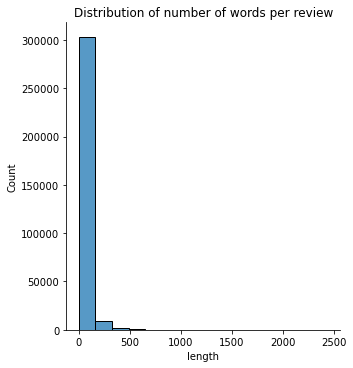

In [38]:
sns.displot(df, x="length", bins = 15).set(title = "Distribution of number of words per review")
plt.show()

In [39]:
print(f'Number of reviews that are more than 200 words: {len(df[df["length"]>200])}')

Number of reviews that are more than 200 words: 7574


In [40]:
#We will attempt to summarize the 7574 rows to a maximum word of 200
row_summarize = df[df['length']>200]

In [41]:
row_summarize.sort_values(by = "length", ascending = True)

,product_description,product,brand,price,productID,imageURLHighRes,reviewer_score,reviewerID,review,summary,length,no_of_tokens
226677,"[, <b>What ingredients are helpful to the skin...",All in One Intense Anti-Aging Face and Body Mo...,ResQ Organics,$39.95,B00L0JYAZG,[https://images-na.ssl-images-amazon.com/image...,5.0,A2I3IWLZ0C3MZ5,I first purchased a product from this company ...,Great product!,201,225
55062,[Premium dental water jet with dramatically im...,Waterpik Ultra Water Flosser,Waterpik,,B000FOI48G,[https://images-na.ssl-images-amazon.com/image...,5.0,A3HC0F1SOC8W8U,I used my Waterpik WP-100 Ultra Dental Water J...,Why did I wait so long?,201,233
318817,[Sea Foam Volumizing Mousse Styling Mousse fea...,SEA FOAM VOLUMIZING MOUSSE - Infused w/Algae E...,Virgo Essentials,,B0181KNXPE,[https://images-na.ssl-images-amazon.com/image...,5.0,A1I8V2D3QPMSXA,I got this Sea Foam Volumizing Mousse by Virgo...,very fine. It gets dull and limp easily,201,234
173460,[],Toji Pure Density: Hair Nutrition. A Vegetaria...,Toji,$55.95,B00ATV35SY,[https://images-na.ssl-images-amazon.com/image...,1.0,A3PGXZ9FZ5TLOT,If I could leave a -5 star rating I would. I ...,Why!!!!!!???????,201,249
55063,[Premium dental water jet with dramatically im...,Waterpik Ultra Water Flosser,Waterpik,,B000FOI48G,[https://images-na.ssl-images-amazon.com/image...,5.0,A3AWLFMKGRMI5M,"Waterpik is a great product, and my dental hyg...",Excellent design updates,201,227
...,...,...,...,...,...,...,...,...,...,...,...,...
199409,[Our special scar treatment is made by careful...,"Acne Scar Reducing Cream, All Natural w/ Tomat...",Diva Stuff,$11.80,B00FXTE88S,[https://images-na.ssl-images-amazon.com/image...,5.0,A1Y5RL5BI90C83,First let me say this worked really well for m...,A REAL PERSONS REVIEW!!!This is Good stuff! I ...,1804,2041
222126,[],Hyaluronic Acid Serum - Anti Aging and Firming...,,,B00K1NKYM0,[https://images-na.ssl-images-amazon.com/image...,3.0,A3JT31LBAMQBP3,There are many things that unspecialized peopl...,Everything You Want to Know about Skincare Pro...,1857,2175
122344,[Uncover the truth in this chilling puzzle mys...,Valuesoft Women's Murder Club: A Darker Shade ...,Valuesoft,,B002BNJ172,[],4.0,A2FRKEXDXDN1KI,"In 2002, James Patterson released his first ""W...",(3.5 stars) The second game in the Women's Mur...,1866,2132
176222,[],GGSELL Latest hot selling Deco Nail decals wat...,,,B00B8Q96KA,[],5.0,AJ6OHRFEZPA24,Let me start by saying that if you have never ...,BETTER THAN STICKERS!!!!!!!!!!!!,2049,2258


### Summarize long text

#### We will attempt to summarize the long text to a max word length of 200 since we have majority of the reviews being less than 200 words

For this operation, we will be utilising **hugging face** pretrained model

In [47]:
#Source: https://huggingface.co/facebook/bart-large-cnn?text=The+tower+is+324+metres+%281%2C063+ft%29+tall%2C+about+the+same+height+as+an+81-storey+building%2C+and+the+tallest+structure+in+Paris.+Its+base+is+square%2C+measuring+125+metres+%28410+ft%29+on+each+side.+During+its+construction%2C+the+Eiffel+Tower+surpassed+the+Washington+Monument+to+become+the+tallest+man-made+structure+in+the+world%2C+a+title+it+held+for+41+years+until+the+Chrysler+Building+in+New+York+City+was+finished+in+1930.+It+was+the+first+structure+to+reach+a+height+of+300+metres.+Due+to+the+addition+of+a+broadcasting+aerial+at+the+top+of+the+tower+in+1957%2C+it+is+now+taller+than+the+Chrysler+Building+by+5.2+metres+%2817+ft%29.+Excluding+transmitters%2C+the+Eiffel+Tower+is+the+second+tallest+free-standing+structure+in+France+after+the+Millau+Viaduct.
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
def summarize_text(text: str, max_len = 200) -> str:
    try:
        summary = summarizer(text, max_length=max_len, min_length=50, do_sample=False)
        return summary[0]["summary_text"]
    except IndexError as ex:
        #logging.warning("Sequence length too large for model, cutting text in half and calling again")
        return summarize_text(text=text[:(len(text) // 2)], max_len=max_len//2) + summarize_text(text=text[(len(text) // 2):], max_len=max_len//2)

In [48]:
#Run the summarizer on our review 
row_summarize['review_summarized'] = row_summarize['review'].apply(summarize_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (1096 > 1024). Running this sequence through the model will result in indexing errors
/var/folders/rq/jvgm9dz559g9xyvpqqc2rlcm0000gn/T/ipykernel_29873/1239679305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_summarize['review_summarized'] = row_summarize['review'].apply(summarize_text)


In [51]:
#Pickle row_summarize
row_summarize.to_pickle('dataset/review_summarized_text.pkl')

In [52]:
row_summarize[["review","review_summarized"]]

,review,review_summarized
82,First American Brands Heartbreaker Fragrance B...,First American Brands Heartbreaker Fragrance B...
88,"I use a lot of perfume, I go through a new bot...","I got this for evaluation, 50% off, in order t..."
90,First American Brands Heartbreaker Fragrance B...,First American Brands Heartbreaker Fragrance B...
109,I really want to thank the writers of fragranc...,"This is one of my favorites. Just a delicious,..."
125,I've always used electric shavers cause I'm on...,I've owned 2 generations of Braun 5000 series ...
...,...,...
381023,"I am a surgical RN, 60, and initially was very...",Surgical/Athletic tape was excellent. Neck ski...
381566,If you're looking for the rubber inside and th...,The grips on the side and back are not okay. Y...
381580,This must be the worst at home colour I have e...,This must be the worst at home colour I have e...
381641,My daughter was very excited about being able ...,Kids' Crest Cavity Protection Sparkle Fun Toot...


In [53]:

df_combined = df.join(row_summarize[["review_summarized"]])
print(df_combined.shape)
df_combined.head()

(314799, 13)


,product_description,product,brand,price,productID,imageURLHighRes,reviewer_score,reviewerID,review,summary,length,no_of_tokens,review_summarized
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,6546546450,[],4.0,A3349A7IGM954K,"Better amplification, better battery life than...",Improvement over older models,20,25,NaN
1,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,6546546450,[],1.0,A1OMHUU58XHQNG,This item is junk. I bought this for my uncle ...,HORRIBLE TV JUNK,74,83,NaN
2,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,,$44.99,7178680776,[],3.0,A3Q0QXUKRGACMU,I've been using it for just about 3 weeks. I t...,I've been using it for just about 3 weeks. ...,31,36,NaN
3,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,No7,$28.76,7250468162,[],5.0,A3MQI5EJSEDO1K,It's difficult to find sometimes so I'm glad t...,Five Stars,12,15,NaN
4,[],Wella Koleston Perfect Hair Colour 44/44 Mediu...,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,5.0,A29TKERPFM55B6,Great color. Covers my gray better than any ha...,Covers Gray,15,17,NaN


In [54]:
#Displaying the 
df_combined[df_combined['review_summarized'].notnull()].head()

,product_description,product,brand,price,productID,imageURLHighRes,reviewer_score,reviewerID,review,summary,length,no_of_tokens,review_summarized
82,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,Jenna Jameson,$13.85,9790787006,[https://images-na.ssl-images-amazon.com/image...,5.0,A3UGHH4IFF5CV3,First American Brands Heartbreaker Fragrance B...,"Surprise, IT SMELLS LOVELY",301,346,First American Brands Heartbreaker Fragrance B...
88,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,Jenna Jameson,$13.85,9790787006,[https://images-na.ssl-images-amazon.com/image...,1.0,A2RYSCZOPEXOCQ,"I use a lot of perfume, I go through a new bot...",This is not going to be my favorite scent.,219,255,"I got this for evaluation, 50% off, in order t..."
90,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,Jenna Jameson,$13.85,9790787006,[https://images-na.ssl-images-amazon.com/image...,5.0,A3FC1W71TBNM0P,First American Brands Heartbreaker Fragrance B...,"Surprise, IT SMELLS LOVELY<3",301,346,First American Brands Heartbreaker Fragrance B...
109,[Jenna Jameson Heartbreaker Perfume for women ...,Jenna Jameson Heartbreaker Perfume for women 3...,Jenna Jameson,$13.85,9790787006,[https://images-na.ssl-images-amazon.com/image...,5.0,AJQ0ZLD45OB7,I really want to thank the writers of fragranc...,Sexy and Comforting...All In One!,320,372,"This is one of my favorites. Just a delicious,..."
125,[This high-tech shaver comes with an LCD indic...,Norelco 6885XL Deluxe Quadra Action Cord/Cordl...,Norelco,,B000050B65,[https://images-na.ssl-images-amazon.com/image...,5.0,AM37QEJBT15TR,I've always used electric shavers cause I'm on...,Sweet Shaver,201,225,I've owned 2 generations of Braun 5000 series ...


In [55]:
df_combined.notnull().sum()

product_description    314799
product                314799
brand                  314799
price                  314799
productID              314799
imageURLHighRes        314799
reviewer_score         314799
reviewerID             314799
review                 314799
summary                314799
length                 314799
no_of_tokens           314799
review_summarized        7574
dtype: int64

The 7574 rows that are summarized have now been merged to the original dataframe, we will now replace the 'review' text with the summarized version.

In [56]:
#Replace original text with summzrized text
df_combined.loc[df_combined["review_summarized"].notnull(), "review"] = df_combined["review_summarized"]

In [57]:
df_combined[df_combined['review_summarized'].notnull()].tail()

,product_description,product,brand,price,productID,imageURLHighRes,reviewer_score,reviewerID,review,summary,length,no_of_tokens,review_summarized
381023,[Nexsey is a medical grade tape designed for u...,Nexsey,Nexsey,$15.99,B01HBZNEHW,[https://images-na.ssl-images-amazon.com/image...,1.0,A2NU92O0YESZBP,Surgical/Athletic tape was excellent. Neck ski...,Nexsey: No! Surgical/Athletic Tape: Far bette...,207,236,Surgical/Athletic tape was excellent. Neck ski...
381566,[Description:<BR><BR> Power Source:USB<BR> Col...,AutumnFall&reg; Shockproof Armor Stand Case Co...,AutumnFall,$3.76,B01HEYYRIK,[https://images-na.ssl-images-amazon.com/image...,2.0,A1A8K80NOU6U4C,The grips on the side and back are not okay. Y...,All plastic,230,262,The grips on the side and back are not okay. Y...
381580,[],Vidal Sassoon Salonist Hair Colour Kit Permane...,,,B01HFEX4NI,[https://images-na.ssl-images-amazon.com/image...,1.0,A2QXKV4JI3SFB5,This must be the worst at home colour I have e...,Difficult to apply. It does nothing on dark ha...,279,319,This must be the worst at home colour I have e...
381641,[Crest Kid's Crest Cavity Protection Toothpast...,Crest Kid's Crest Cavity Protection Toothpaste...,Crest,$10.84,B01HFWIKH0,[],5.0,A27AARUY91S8KO,Kids' Crest Cavity Protection Sparkle Fun Toot...,... being able to sample Kids' Crest Cavity Pr...,205,231,Kids' Crest Cavity Protection Sparkle Fun Toot...
381731,[<b>Package Includes</b> <br>1pcs X New high q...,JahyShow Replacement Shaver Head For Philips N...,Jahyshow,$13.80,B01HHJQN8E,[https://images-na.ssl-images-amazon.com/image...,5.0,A2R4FYJXPX0ZN4,The new N-blade heads are much better than the...,Saved my Norelco 3D from the Trash Bin.,218,247,The new N-blade heads are much better than the...


In [58]:
#Dropping columns: "length", "review_summarized" and "summary"
df_combined.drop(columns = ["length", "review_summarized", "summary","no_of_tokens"], inplace = True)

In [59]:
df_combined.reset_index(drop = True, inplace = True)

In [68]:
#Pickle df_combined
df_combined.to_pickle('dataset/df_summarized2.pkl')

In [61]:
df_combined.head()

,product_description,product,brand,price,productID,imageURLHighRes,reviewer_score,reviewerID,review
0,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,6546546450,[],4.0,A3349A7IGM954K,"Better amplification, better battery life than..."
1,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,6546546450,[],1.0,A1OMHUU58XHQNG,This item is junk. I bought this for my uncle ...
2,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,,$44.99,7178680776,[],3.0,A3Q0QXUKRGACMU,I've been using it for just about 3 weeks. I t...
3,[No7 Stay Perfect Foundation now stays perfect...,No7 Stay Perfect Foundation Cool Vanilla by No7,No7,$28.76,7250468162,[],5.0,A3MQI5EJSEDO1K,It's difficult to find sometimes so I'm glad t...
4,[],Wella Koleston Perfect Hair Colour 44/44 Mediu...,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,5.0,A29TKERPFM55B6,Great color. Covers my gray better than any ha...


### Analyzing the Reviewer Scores

In [62]:
no_of_rated_products_per_user = df_combined.groupby(by='reviewerID')['reviewer_score'].count().sort_values(ascending=False)
no_of_rated_products_per_user

reviewerID
A2GJX2KCUSR0EI    25
A1KSC91G9AIY2Z    22
AENH50GW3OKDA     20
A1EGCED01USBA9    19
A22CW0ZHY3NJH8    18
                  ..
A2AJGEX6B5TRK9     1
A2AJHI6OWF3O57     1
A2AJJ67JJMH3Q8     1
A2AJJVVIKW4998     1
A2W0H93R0E0OPV     1
Name: reviewer_score, Length: 295217, dtype: int64

In [63]:
no_of_rated_products_per_user.describe()

count    295217.000000
mean          1.066331
std           0.338082
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          25.000000
Name: reviewer_score, dtype: float64

Most of the reviewers in this dataset only leaves 1 review

In [64]:
#Average rating of the product 

df_combined.groupby('productID')['reviewer_score'].mean().head()

productID
6546546450    2.5
7178680776    3.0
7250468162    5.0
7367905066    5.0
7414204790    4.4
Name: reviewer_score, dtype: float64

In [65]:
mean_product_ratings = pd.DataFrame(df_combined.groupby('productID')['reviewer_score'].mean())

In [66]:
mean_product_ratings

,reviewer_score
productID,
6546546450,2.5
7178680776,3.0
7250468162,5.0
7367905066,5.0
7414204790,4.4
...,...
B01HIWLLUK,5.0
B01HJ1K3YK,1.0
B01HJ84SGM,5.0


In [69]:
# We create a new dataframe to join with mean_product_ratings

In [ ]:
df_combined.set_index("productID", inplace= True)

In [83]:
df_combined.head(3)

,product_description,product,brand,price,imageURLHighRes,reviewer_score,reviewerID,review
productID,,,,,,,,
6546546450,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,[],4.0,A3349A7IGM954K,"Better amplification, better battery life than..."
6546546450,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,[],1.0,A1OMHUU58XHQNG,This item is junk. I bought this for my uncle ...
7178680776,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,,$44.99,[],3.0,A3Q0QXUKRGACMU,I've been using it for just about 3 weeks. I t...


In [97]:
df_product_reviews = pd.merge(df_combined, mean_product_ratings, left_index=True, right_index=True)

In [99]:
df_product_reviews.head(3)

,product_description,product,brand,price,imageURLHighRes,reviewer_score_x,reviewerID,review,reviewer_score_y
productID,,,,,,,,,
6546546450,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,[],4.0,A3349A7IGM954K,"Better amplification, better battery life than...",2.5
6546546450,[Loud 'N Clear Personal Sound Amplifier allows...,Loud 'N Clear&trade; Personal Sound Amplifier,idea village,,[],1.0,A1OMHUU58XHQNG,This item is junk. I bought this for my uncle ...,2.5
7178680776,[No7 Lift & Luminate Triple Action Serum 50ml ...,No7 Lift &amp; Luminate Triple Action Serum 50...,,$44.99,[],3.0,A3Q0QXUKRGACMU,I've been using it for just about 3 weeks. I t...,3.0


In [100]:
#Rename Scoring Columns
df_product_reviews.rename(columns={"reviewer_score_x": "reviewer_score",
                                   "reviewer_score_y": "average_reviewer_score"},inplace=True)

In [103]:
#Pickle df_product_score
df_product_reviews.to_pickle('dataset/product_score.pkl')